# Analyzing marketing campaign

### Change types

In [1]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

wd = os.getcwd()

marketing = pd.read_csv(wd+'\marketing.csv', 
                        parse_dates = ['date_served', 'date_subscribed', 'date_canceled'])
print(marketing.describe())
print(marketing.info())

           user_id          date_served marketing_channel  variant converted  \
count        10037                10021             10022    10037     10022   
unique        7309                   31                 5        2         2   
top     a100000882  2018-01-15 00:00:00         House Ads  control     False   
freq            12                  789              4733     5091      8946   
first          NaN  2018-01-01 00:00:00               NaN      NaN       NaN   
last           NaN  2018-01-31 00:00:00               NaN      NaN       NaN   

       language_displayed language_preferred    age_group  \
count               10037              10037        10037   
unique                  4                  4            7   
top               English            English  19-24 years   
freq                 9793               9275         1682   
first                 NaN                NaN          NaN   
last                  NaN                NaN          NaN   

           

In [2]:
# Converting is_retained to a boolean
marketing['is_retained'] = marketing['is_retained'].astype('bool')
print(marketing['is_retained'].dtype)

bool


### Feature engineering

In [3]:
# Mapping for channels
channel_dict = {"House Ads": 1, "Instagram": 2, 
                "Facebook": 3, "Email": 4, "Push": 5}

# Map the channel to a channel code
marketing['channel_code'] = marketing['subscribing_channel'].map(channel_dict)

# Add the new column is_correct_lang
marketing['is_correct_lang'] = np.where(
    marketing['language_preferred'] == marketing['language_displayed'], 
    'Yes', 
    'No')
# Add a DoW column
marketing['DoW'] = marketing['date_subscribed'].dt.dayofweek

In [18]:
pd.DataFrame(marketing['DoW']).apply(np.mean, axis = 0)

DoW    2.529634
dtype: float64

### Exploratory data analysis

In [5]:
# Group by date_served and count number of unique user_id's
daily_users = marketing.groupby(['date_served'])['user_id'].nunique()

# Print head of daily_users
print(daily_users.head())

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64


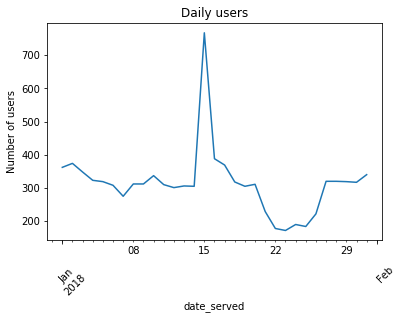

In [6]:
# Plot daily_subscribers
daily_users.plot()

# Include a title and y-axis label
plt.title('Daily users')
plt.ylabel('Number of users')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation = 45)

# Display the plot
plt.show()

### Conversion & retention rate

In [7]:
# Calculate the number of people we marketed to
total = marketing['user_id'].nunique()

# Calculate the number of people who subscribed
subscribers = marketing[marketing["converted"] == True]\
                            ['user_id'].nunique()

# Calculate the conversion rate
conversion_rate = subscribers/total
print(round(conversion_rate*100, 2), "%")

13.89 %


In [19]:
marketing['user_id'].nunique()

7309

In [8]:
# Calculate the number of subscribers
total_subscribers = marketing[marketing["converted"] == True]\
                            ['user_id'].nunique()

# Calculate the number of people who remained subscribed
retained = marketing[marketing['is_retained'] == True]\
                   ['user_id'].nunique()

# Calculate the retention rate
retention_rate = retained/total_subscribers
print(round(retention_rate*100, 2), "%")

686.4 %


### Groupby

In [9]:
# Isolate english speakers
english_speakers = marketing[marketing['language_displayed'] == 'English']

# Calculate the total number of english speaking users
total = english_speakers['user_id'].nunique()

# Calculate the number of english speakers who converted
subscribers = english_speakers[english_speakers['converted'] == True]\
                            ['user_id'].nunique()

# Calculate conversion rate
conversion_rate = subscribers/total
print('English speaker conversion rate:',  round(conversion_rate*100,2), '%')

English speaker conversion rate: 12.92 %


In [10]:
# Group by language_displayed and count unique users
total = marketing.groupby(['language_displayed'])['user_id'].nunique()

# Group by language_displayed and count unique conversions
subscribers = marketing[marketing['converted'] == True].groupby(['language_displayed'])['user_id'].nunique()

# Calculate the conversion rate for all languages
language_conversion_rate = subscribers/total
print(language_conversion_rate)

language_displayed
Arabic     0.500000
English    0.129167
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64


In [27]:
x = marketing.groupby('DoW')['user_id'].nunique()
y = marketing[marketing['converted'] == True].groupby('DoW')['user_id'].nunique()

y/x

DoW
0.0    0.945355
1.0    0.972973
2.0    0.965686
3.0    0.973684
4.0    0.990196
5.0    0.980952
6.0    0.981132
Name: user_id, dtype: float64

In [11]:
# Group by date_served and count unique users
total = marketing.groupby(['date_served'])['user_id'].nunique()

# Group by date_served and count unique converted users
subscribers = marketing[marketing['converted'] == True].groupby('date_served')['user_id'].nunique()

# Calculate the conversion rate per day
daily_conversion_rate = subscribers/total
print(daily_conversion_rate)

date_served
2018-01-01    0.099448
2018-01-02    0.098930
2018-01-03    0.103448
2018-01-04    0.108359
2018-01-05    0.125392
2018-01-06    0.113636
2018-01-07    0.141818
2018-01-08    0.115385
2018-01-09    0.125000
2018-01-10    0.118694
2018-01-11    0.080645
2018-01-12    0.076412
2018-01-13    0.084967
2018-01-14    0.085246
2018-01-15    0.113429
2018-01-16    0.255155
2018-01-17    0.219512
2018-01-18    0.091195
2018-01-19    0.059016
2018-01-20    0.067524
2018-01-21    0.087336
2018-01-22    0.123596
2018-01-23    0.122093
2018-01-24    0.115789
2018-01-25    0.125000
2018-01-26    0.090090
2018-01-27    0.065625
2018-01-28    0.062500
2018-01-29    0.059561
2018-01-30    0.066246
2018-01-31    0.052941
Name: user_id, dtype: float64


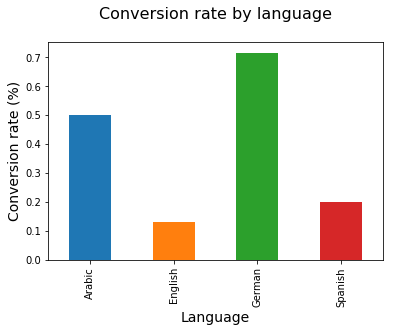

In [12]:
# Create a bar chart using language_conversion_rate DataFrame
language_conversion_rate.plot(kind = 'bar')

# Add a title and x and y-axis labels
plt.title('Conversion rate by language\n', size = 16)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('Language', size = 14)

# Display the plot
plt.show()

### Groupby to dataframe

In [13]:
# Reset index to turn the results into a DataFrame
daily_conversion_rate = pd.DataFrame(daily_conversion_rate.reset_index(0))

# Rename columns
daily_conversion_rate.columns = ['date_served', 
                              'conversion_rate']

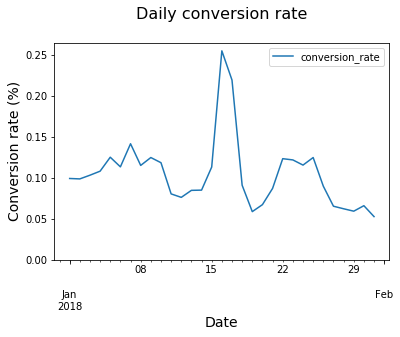

In [14]:
# Create a line chart using daily_conversion_rate DataFrame
daily_conversion_rate.plot('date_served', 
                           'conversion_rate')

plt.title('Daily conversion rate\n', size = 16)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('Date', size = 14)

# Set the y-axis to begin at 0
plt.ylim(0)

# Display the plot
plt.show()

### Unstack

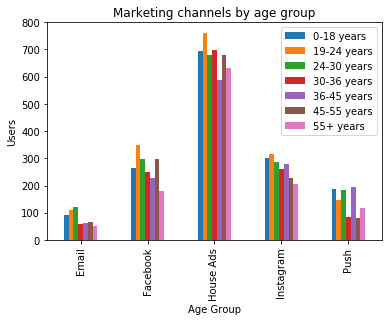

In [15]:
channel_age = marketing.groupby(['marketing_channel', 'age_group'])['user_id'].count()

# Unstack channel_age and transform it into a DataFrame
channel_age_df = pd.DataFrame(channel_age.unstack(level = 1))

# Plot the results
channel_age_df.plot(kind = 'bar')
plt.title('Marketing channels by age group')
plt.xlabel('Age Group')
plt.ylabel('Users')
# Add a legend to the plot
plt.legend(loc = 'upper right', 
           labels = channel_age_df.columns.values)
plt.show()

In [36]:
# Count the subs by subscribing channel and date subscribed
retention_total = marketing.groupby(['date_subscribed',
                                     'subscribing_channel'])\
                                       ['user_id'].nunique()

# Print results
print(retention_total.head())

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                8
                 House Ads              16
                 Instagram               8
                 Push                    3
Name: user_id, dtype: int64


In [37]:
# Count the retained subs by subscribing channel and date subscribed
retention_subs = marketing[marketing['is_retained'] == True]\
                           .groupby(['date_subscribed',
                                     'subscribing_channel'])\
                            ['user_id'].nunique()

# Print results
print(retention_subs.head())

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                7
                 House Ads              11
                 Instagram               6
                 Push                    3
Name: user_id, dtype: int64


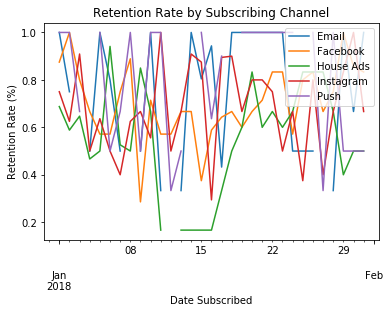

In [38]:
# Divide retained subscribers by total subscribers
retention_rate = retention_subs/retention_total
retention_rate_df = pd.DataFrame(retention_rate.unstack(level=1))

# Plot retention rate
retention_rate_df.plot()

# Add a title, x-label, y-label, legend and display the plot
plt.title('Retention Rate by Subscribing Channel')
plt.xlabel('Date Subscribed')
plt.ylabel('Retention Rate (%)')
plt.legend(loc = 'upper right', 
           labels = retention_rate_df.columns.values)
plt.show()

### Functions

In [41]:
def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe['converted'] == True].groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()   
    
    # Conversion rate 
    conversion_rate = column_conv/column_total
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

In [42]:
def plotting_conv(dataframe):
    for column in dataframe:
        # Plot column by dataframe's index
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + str(column) + ' conversion rate\n', 
                  size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.xlabel('Date', size = 14)
        # Show plot
        plt.show()
        plt.clf()

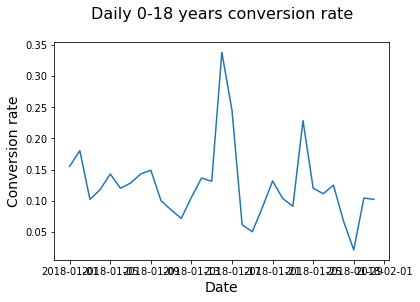

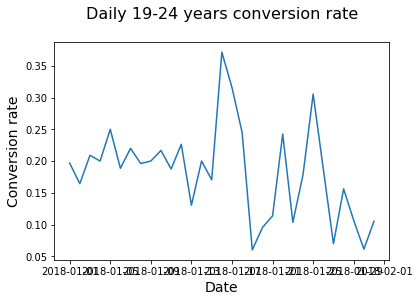

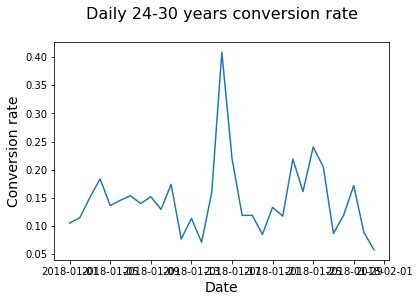

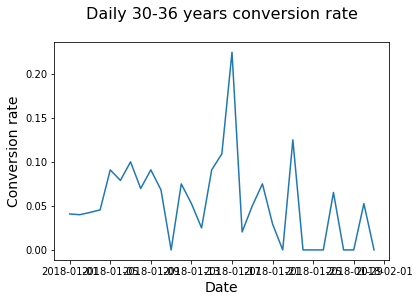

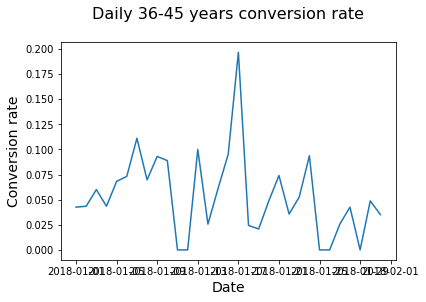

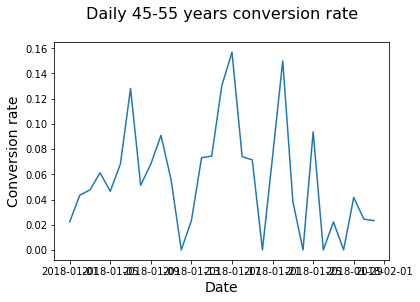

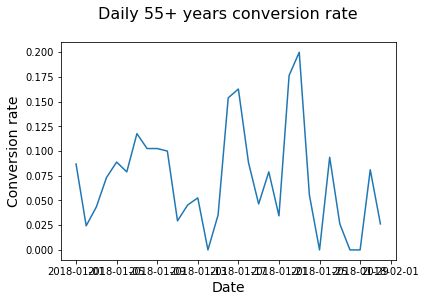

<Figure size 432x288 with 0 Axes>

In [43]:
# Calculate conversion rate by date served and age group
age_group_conv = conversion_rate(marketing, 
                                 ['date_served', 'age_group'])

# Unstack age_group_conv and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

# Plot the results
plotting_conv(age_group_df)

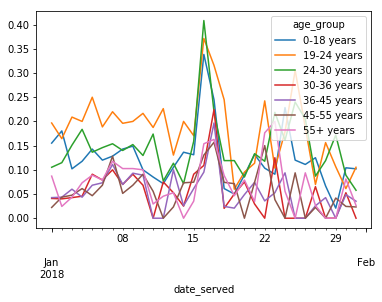

In [45]:
age_group_df.plot()
plt.show()

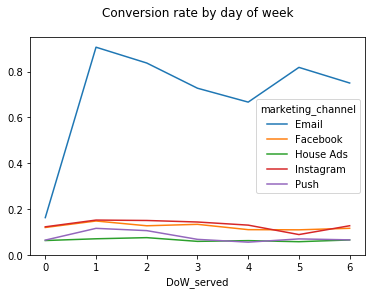

In [46]:
# Add day of week column to marketing
marketing['DoW_served'] = marketing['date_served'].dt.dayofweek

# Calculate conversion rate by day of week
DoW_conversion = conversion_rate(marketing, ['DoW_served', 
                                             'marketing_channel'])

# Unstack channels
DoW_df = pd.DataFrame(DoW_conversion.unstack(level=1))

# Plot conversion rate by day of week
DoW_df.plot()
plt.title('Conversion rate by day of week\n')
plt.ylim(0)
plt.show()

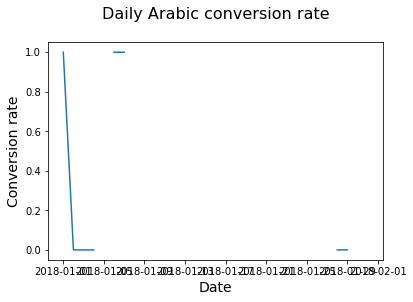

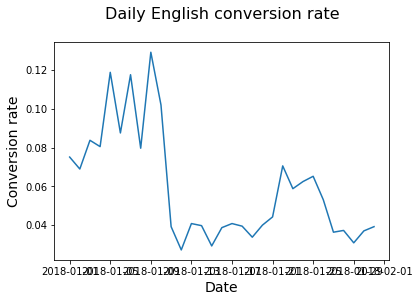

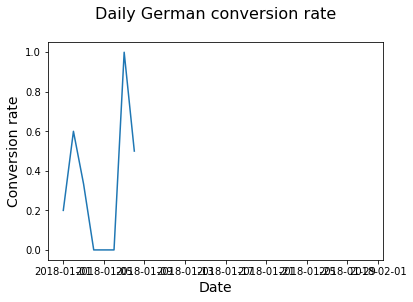

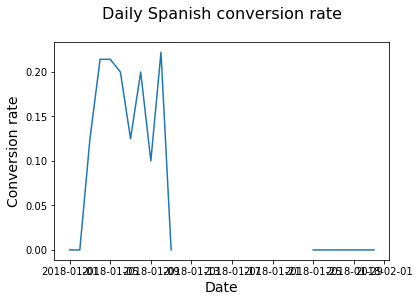

<Figure size 432x288 with 0 Axes>

In [47]:
# Isolate the rows where marketing channel is House Ads
house_ads = marketing[marketing['marketing_channel'] == 'House Ads']

# Calculate conversion by date served, and language displayed
conv_lang_channel = conversion_rate(house_ads, ['date_served', 'language_displayed'])

# Unstack conv_lang_channel
conv_lang_df = pd.DataFrame(conv_lang_channel.unstack(level=1))

# Use your plotting function to display results
plotting_conv(conv_lang_df)

### AB Testing

Refers to randomized experiment which evaluates which variant performs better.

Prior to test, we need to know:
* What is the desired outcome? What is our hypothesis?
* What is the metric we are trying to impact (page views, conversions)?
* Will we get enough traffic to our site to reach statistical significance and make decision in a timely manner?

#### Testing which email strategy is better: half of the emails were generic, and other half was personalized.


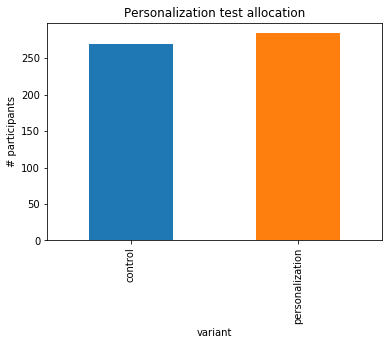

In [50]:
# Subset the DataFrame
email = marketing[marketing['marketing_channel'] == 'Email']

# Group the email DataFrame by variant 
alloc = email.groupby(['variant'])['user_id'].nunique()

# Plot a bar chart of the test allocation
alloc.plot(kind = 'bar')
plt.title('Personalization test allocation')
plt.ylabel('# participants')
plt.show()

In [52]:
# Group marketing by user_id and variant
subscribers = email.groupby(['user_id', 
                             'variant'])['converted'].max()
subscribers_df = pd.DataFrame(subscribers.unstack(level=1)) 

# Drop missing values from the control column
control = subscribers_df['control'].dropna()

# Drop missing values from the personalization column
personalization = subscribers_df['personalization'].dropna()

print('Control conversion rate:', np.mean(control))
print('Personalization conversion rate:', np.mean(personalization))

Control conversion rate: 0.2814814814814815
Personalization conversion rate: 0.3908450704225352


### Calculate lift and test significance

In [88]:
def lift(a,b):
    # Calcuate the mean of a and b 
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    
    # Calculate the lift using a_mean and b_mean
    lift = (b_mean-a_mean)/a_mean
  
    return str(round(lift*100, 2)) + '%'
  
# Print lift() with control and personalization as inputs
print(lift(control, personalization))

from scipy.stats import ttest_ind

print(ttest_ind(personalization, control))

38.85%
Ttest_indResult(statistic=2.7343299447505074, pvalue=0.0064514878446941745)


### Test in segments (languages)

In [92]:
def ab_segmentation(segment):
  # Build a for loop for each segment in marketing
  for subsegment in np.unique(marketing[segment].values):
        print(subsegment)
      
      # Limit marketing to email and subsegment      
        email = marketing[(marketing['marketing_channel'] == 'Email') & (marketing[segment] == subsegment)]

        subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
        subscribers = pd.DataFrame(subscribers.unstack(level=1)) 
        control = subscribers['control'].dropna()
        personalization = subscribers['personalization'].dropna()

        print('lift:', lift(control, personalization))
        print('t-statistic:', ttest_ind(control, personalization), '\n\n')

In [93]:
ab_segmentation('language_displayed')

Arabic
lift: 50.0%
t-statistic: Ttest_indResult(statistic=-0.5773502691896255, pvalue=0.5795840000000001) 


English
lift: 39.0%
t-statistic: Ttest_indResult(statistic=-2.2183598646203166, pvalue=0.026991701290720815) 


German
lift: -1.62%
t-statistic: Ttest_indResult(statistic=0.1910083418078718, pvalue=0.8494394170062678) 


Spanish
lift: 166.67%
t-statistic: Ttest_indResult(statistic=-2.3570226039551585, pvalue=0.040156718110477524) 




In [94]:
ab_segmentation('age_group')

0-18 years
lift: 121.4%
t-statistic: Ttest_indResult(statistic=-2.966044912142211, pvalue=0.0038724494391297226) 


19-24 years
lift: 106.24%
t-statistic: Ttest_indResult(statistic=-3.03179438478667, pvalue=0.0030623836114689134) 


24-30 years
lift: 161.19%
t-statistic: Ttest_indResult(statistic=-3.861539544326876, pvalue=0.00018743381094867335) 


30-36 years
lift: -100.0%
t-statistic: Ttest_indResult(statistic=3.1859064644147996, pvalue=0.0023238487431765137) 


36-45 years
lift: -85.23%
t-statistic: Ttest_indResult(statistic=2.4317901279318503, pvalue=0.017975686009788286) 


45-55 years
lift: -72.22%
t-statistic: Ttest_indResult(statistic=2.065499127317933, pvalue=0.043062339688201196) 


55+ years
lift: -100.0%
t-statistic: Ttest_indResult(statistic=3.3265654564203397, pvalue=0.0016358623456360435) 


